# Data Science - юни 2019 Exam SoftUni 2019
# Radoslav Ivanov 
## Ресторант "Щастливеца" - сравнение на менюта по цени


### Абстракт
Ще сравня цените на **първите две страници от менюто** на ресторант "Щастливеца" : http://www.shtastliveca.com/bg/menu.html за **Велико Търново и Стара Загора - Лято 2019** http://www.shtastliveca.com/uf/menu/36/ewioh1.pdf  (по-долу в дейта сет-а съм ги нарекъл "извън София") (използвам променлива menu),  **София меню - Лято 2019** http://www.shtastliveca.com/uf/menu/34/zqwb4kmz.pdf и **София меню - Пролет 2019** http://www.shtastliveca.com/uf/menu/36/13.pdf  (използвам променлива menu_old) (което беше началната ми идея, но менюто се смени :) ). 

Целта ми е да покажа, че цените в София са по-високи и че новите цени в София Лято са по-високи от цените Пролет (като имам предвид, че менюто пролет и лято не съвпадат едно към едно, но приемам, че са достатъчно подобни). 

### Обработка на данни

За OCR на данните съм използвал команди, подобни на **tesseract** other1.png other1 -l bul.
За форматиране на дейтасет-а съм използвал notepad++ с find ([0-9]+ гр .) и replace \1; и други подобни, както и съм извършил и малко ръчна работа по форматиране имената на ястията. Също така, има и ястия, които може да се приготвят с няколко продукта или да се добави дадена съставка към ястието, те са с тире -, аз съм ги представил в дейтасет-а като основно ястие + - добавка или продукт. Например:

САЛАТА ОТ БЕЛЕНИ ДОМАТИ 300 гр.
СЪС СИРЕНЕ ПО ИЗБОР /7.8/
/подправена с билков зехтин, риган, орехи
и мариновани маслини/

- с краве сирене - 7.50 лв.

като

*САЛАТА ОТ БЕЛЕНИ ДОМАТИ СЪС СИРЕНЕ ПО ИЗБОР - с краве сирене -  ;300 гр.; 7.50 лв.;/7,8/;/подправена с билков зехтин, риган, орехии мариновани маслини/*

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from skimage.io import imread

In [3]:
page1 = imread("data/page1.png")
page2 = imread("data/page2.png")


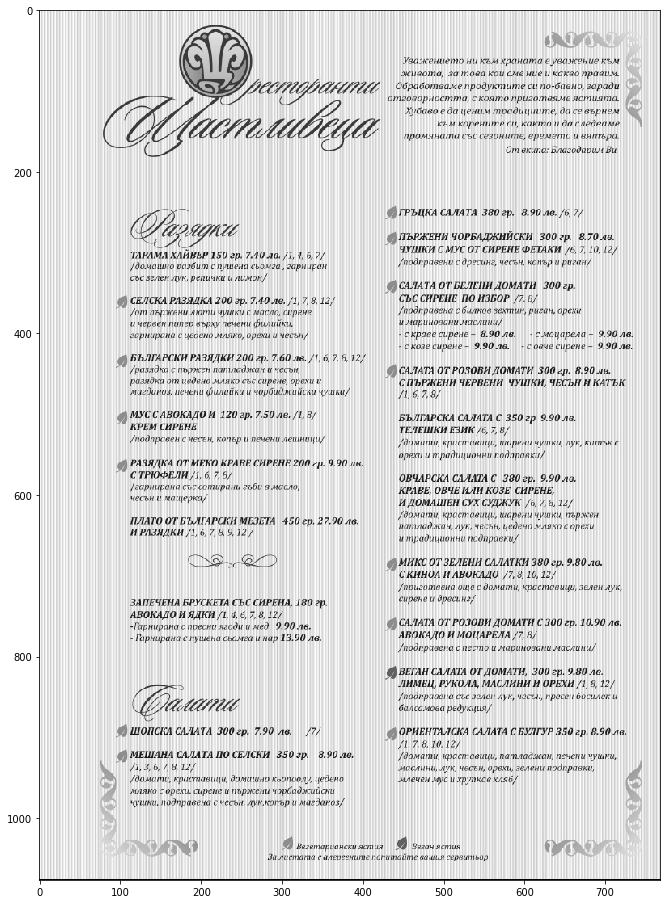

In [4]:
plt.figure(figsize = (20, 16))
plt.imshow(page1)


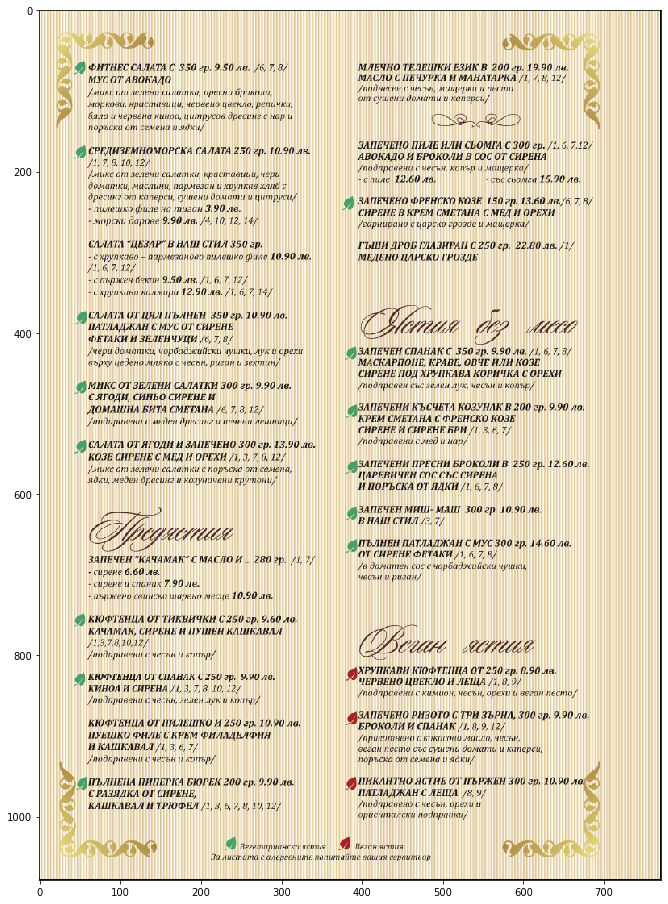

In [5]:
plt.figure(figsize = (20, 16))
plt.imshow(page2)

In [6]:
menu_old = pd.read_csv("data/Shtastliveca1.csv", sep=';',header=None, names = ["Ястие","Грамаж в гр.","Цена","Алергени","Съставки"])

In [7]:
menu_old

,Ястие,Грамаж в гр.,Цена,Алергени,Съставки
0,ТАРАМА ХАЙВЕР,150 гр.,7.40 лв.,"/1, 4,6,7/","/домашно разбит с пушена сьомга , гарнирансъс ..."
1,СЕЛСКА РАЗЯДКА,200 гр.,7.40 лв.,"/1, 7,8,12/","/от пържени люти чушки с масло, сиренеи червен..."
2,БЪЛГАРСКИ РАЗЯДКИ,200 гр.,7.60 лв.,"/1,6, 7, 8, 12/","/разяйдка с пържен патладжан и чесън,разядка о..."
3,МУС САВОКАДО И КРЕМ СИРЕНЕ,120 гр.,7.50 лв.,"/1, 8/","/подправен с чесън, копър и печени лешници/"
4,РАЗЯДКА ОТ МЕКО КРАВЕ СИРЕНЕ С ТРЮФЕЛИ,200 гр.,9.90 лв.,"/1, 6, 7, 8/","/гарнирана със сотирани гъби в масло,чесън и м..."
5,ПЛАТО ОТ БЪЛГАРСКИ МЕЗЕТА И РАЗЯДКИ,450 гр.,27.90 лв.,"/1,6,7,8,9,12/",NaN
6,"ЗАПЕЧЕНА БРУСКЕТА СЪС СИРЕНА,АВОКАДО И ЯДКИ - ...",180 гр.,9.90 лв.,"/1, 4, 6, 7, 8, 12/",NaN
7,"ЗАПЕЧЕНА БРУСКЕТА СЪС СИРЕНА,АВОКАДО И ЯДКИ - ...",180 гр.,13.90 лв.,"/1, 4, 6, 7, 8, 12/",NaN
8,ШОПСКА САЛАТА,300 гр.,7.90 лв.,"/1,7/",NaN
9,МЕШАНА САЛАТА ПО СЕЛСКИ,350 гр.,8.90 лв.,"/1 3,6,7,8,12/","/домати, краставици, домашно кьопоолу, цедено ..."


### Почистване и форматиране на данните
Ще премахна грамовете (гр.)и левовете (лв.) съответно от колоните "Грамаж в гр." и "Цена"


In [8]:
menu_old["Грамаж в гр."] = menu_old["Грамаж в гр."].str.extract('(\d+)', expand=True).astype('int64')

In [9]:
menu_old["Цена"] = menu_old["Цена"].str.extract('(\d+\.\d+)', expand=True).astype('float')

In [10]:
menu_old

,Ястие,Грамаж в гр.,Цена,Алергени,Съставки
0,ТАРАМА ХАЙВЕР,150,7.4,"/1, 4,6,7/","/домашно разбит с пушена сьомга , гарнирансъс ..."
1,СЕЛСКА РАЗЯДКА,200,7.4,"/1, 7,8,12/","/от пържени люти чушки с масло, сиренеи червен..."
2,БЪЛГАРСКИ РАЗЯДКИ,200,7.6,"/1,6, 7, 8, 12/","/разяйдка с пържен патладжан и чесън,разядка о..."
3,МУС САВОКАДО И КРЕМ СИРЕНЕ,120,7.5,"/1, 8/","/подправен с чесън, копър и печени лешници/"
4,РАЗЯДКА ОТ МЕКО КРАВЕ СИРЕНЕ С ТРЮФЕЛИ,200,9.9,"/1, 6, 7, 8/","/гарнирана със сотирани гъби в масло,чесън и м..."
5,ПЛАТО ОТ БЪЛГАРСКИ МЕЗЕТА И РАЗЯДКИ,450,27.9,"/1,6,7,8,9,12/",NaN
6,"ЗАПЕЧЕНА БРУСКЕТА СЪС СИРЕНА,АВОКАДО И ЯДКИ - ...",180,9.9,"/1, 4, 6, 7, 8, 12/",NaN
7,"ЗАПЕЧЕНА БРУСКЕТА СЪС СИРЕНА,АВОКАДО И ЯДКИ - ...",180,13.9,"/1, 4, 6, 7, 8, 12/",NaN
8,ШОПСКА САЛАТА,300,7.9,"/1,7/",NaN
9,МЕШАНА САЛАТА ПО СЕЛСКИ,350,8.9,"/1 3,6,7,8,12/","/домати, краставици, домашно кьопоолу, цедено ..."


In [11]:
menu_old.describe().T

,count,mean,std,min,25%,50%,75%,max
Грамаж в гр.,53.0,281.320755,67.312067,120.0,250.0,300.0,300.0,450.0
Цена,53.0,10.809434,3.843689,3.9,8.9,9.9,10.9,27.9


In [12]:
menu_old.dtypes

Ястие            object
Грамаж в гр.      int64
Цена            float64
Алергени         object
Съставки         object
dtype: object

### Анализ на данните за цените в меню "Пролет"

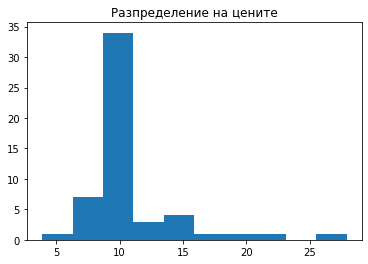

In [13]:
plt.hist(menu_old["Цена"])
plt.title("Разпределение на цените")
plt.show()

In [14]:
menu_old["Цена"].mean()

10.809433962264146

In [15]:
menu_old["Цена"].mode()

0    9.9
dtype: float64

In [16]:
menu_old["Цена"].median()

9.9

Виждам, че средната цена на ястията е около 10 лв. Нека покажа няколко от най-евтините ястия:

In [17]:
menu_old[menu_old["Цена"] < 8]

,Ястие,Грамаж в гр.,Цена,Алергени,Съставки
0,ТАРАМА ХАЙВЕР,150,7.4,"/1, 4,6,7/","/домашно разбит с пушена сьомга , гарнирансъс ..."
1,СЕЛСКА РАЗЯДКА,200,7.4,"/1, 7,8,12/","/от пържени люти чушки с масло, сиренеи червен..."
2,БЪЛГАРСКИ РАЗЯДКИ,200,7.6,"/1,6, 7, 8, 12/","/разяйдка с пържен патладжан и чесън,разядка о..."
3,МУС САВОКАДО И КРЕМ СИРЕНЕ,120,7.5,"/1, 8/","/подправен с чесън, копър и печени лешници/"
8,ШОПСКА САЛАТА,300,7.9,"/1,7/",NaN
25,СРЕДИЗЕМНОМОРСКА САЛАТА- пилешко филе на тиган,250,3.9,"/1,7,8,10,12/","/микс от зелени салатки, краставици, черидомат..."
33,ЗАПЕЧЕН “КАЧАМАК“” С МАСЛО И...- сирене,280,6.6,"/1, 7/",NaN
34,ЗАПЕЧЕН “КАЧАМАК“” С МАСЛО И...- сирене и спанак,280,7.9,"/1, 7/",NaN


Нека сега прочета само цените от менютата за **Велико Търново и Стара Загора - Лято 2019** ,  **София меню - Лято 2019** (other_price и sofia_price_new).

In [18]:
other = ""
with open("data\other.txt", "r", encoding = "utf-8") as f:
    other = f.read()
print(other)


ТАРАМА ХАЙВЕР 150 гр. 5.90 лв. /1. 4.6.7/
/домашна разбит с пушена сьомга , гарниран
съсзелен ук, репички и лимон/

#) СЕЛСКА РАЗЯДКА 200 гр. 5.90 лв. /1,7,8,12/
/от пържени люти чушки с масло, сирене.
и червен пипер върху печени филийки,
гарнирана с цедено мляко, орехи и чесън/

БЪЛГАРСКИ РАЗЯДКИ 200 гр. 5.90 лв. /1,67,8.12/
/разяйдка с пържен патладжан и чесън,

разядка от цедено мляко със сирене, орехи и.
магданоз, печени филийки и чорбаджийска чушка/

4) МУС САВОКАДО И 120 гр. 5.90 лв./1.7.8/.
КРЕМ СИРЕНЕ
/подправен с чесън, копър и печени лешници/

4 РАЗЯДКА ОТ МЕКО КРАВЕ СИРЕНЕ 200 гр. 8.90 лв.
СТРЮФЕЛИ /1.6.7.8/
/гарнирана със сотирани гъби в масло,
Чесън и мащерка/.

ПЛАТО ОТ БЪЛГАРСКИ МЕЗЕТА 450 гр. 25.90 лв.
И РАЗЯДКИ /1.6,7.8,9,12/

Съе 7

ЗАПЕЧЕНА БРУСКЕТА СЪС 180 гр. 12.70 лв.
СИРЕНА, АВОКАДО, ЯДКИ,
И ПУШЕНА СЬОМГА/1, 4.6.7.8,11,12/

ЗАПЕЧЕНА БРУСКЕТА С 160 гр. 7.60 лв.
КОЗЕ СИРЕНЕ, БРИ И КРУШИ /1.7.8,12/
/гарнирана с мед, печени орехи и мащерка/

ЙИ/М%

## ШОПСКА САЛАТА 3

In [19]:
pattern= "\d+.\d+ лв"
other_price = re.findall(pattern, other, flags=0)

In [20]:
len(other_price)

54

In [21]:
menu_old.shape

(53, 5)

От тук забелязвам,че в новите менюта има един запис повече, което ме кара да проверя по-внимателно данните и забелязвам, че менюто е сменено и ще трябва отново да обработя данните, не мога да използвам същия дейтасет.

In [22]:
sofianew = ""
with open("data\sofianew.txt", "r", encoding = "utf-8") as f:
    sofianew = f.read()
print(sofianew)


ТАРАМА ХАЙВЕР 150 гр. 8.60 лв. /1, 4 6, 7/
/домашно разбит с пушена сьомга , гарниран
със зелен лук, репички и лимон/

, СЕЛСКА РАЗЯДКА 200 гр. 7.90 лв. /1, 7,8,12/
/от пържени люти чушки с масло, сирене
и червен пипер върху печени филийки,
гарнирана с цедено мляка, орехи и чесън/

я БЪЛГАРСКИ РАЗЯДКИ 200 гр. 8.70 лв. /1,6, 7, 8, 12/
/разяйдка с пържен патладжан и чесън,
разядка от цедено мляко със сирене, орехи и
магданоз, печени филийки и чорбаджийска чушка/

я МУС С АВОКАДО И 120 гр. 8.60 лв./1, 7,8/
КРЕМ СИРЕНЕ
/подправен с чесън, копър и печени лешници/

я РАЗЯДКА ОТ МЕКО КРАВЕ 200 гр. 10.90 лв.
СИРЕНЕ С ТРЮФЕЛИ /1, 6, 7, 8/
/гарнирана със сотирани гъби в масло,
чесън и мащерка/

ПЛАТО ОТ БЪЛГАРСКИ МЕЗЕТА 450 гр.28.90 лв.
И РАЗЯДКИ /1,6,7,8,9,12/

Съе 27

ЗАПЕЧЕНА БРУСКЕТА СЪС 180 гр. 13.90 лв.
СИРЕНА, АВОКАДО, ЯДКИ
И ПУШЕНА СЬОМГА /1, 4,6,7, 8, 11, 12/

„ ЗАПЕЧЕНА БРУСКЕТА С 160гр. 8.90 лв.
КОЗЕ СИРЕНЕ, БРИ И КРУШИ /1,7,8, 12/
/гарнирана с мед, печени орехи и мащерка/

#) ШОПСКА 

In [23]:
sofia_price_new = re.findall(pattern, sofianew, flags=0)

In [24]:
len(sofia_price_new)

54

Правим на ново всичките магий по създаването на новия дейтасет new. OCR, replace, formating ....

In [25]:
menu = pd.read_csv("data/ShtastlivecaOtherNew.csv", sep=';',header=None, names = ["Ястие","Грамаж в гр.","Цена извън София","Алергени","Съставки"])

menu

In [26]:
menu

,Ястие,Грамаж в гр.,Цена извън София,Алергени,Съставки
0,ТАРАМА ХАЙВЕР,150 гр.,5.90 лв.,"/1, 4,6,7/","/домашна разбит с пушена сьомга , гарнирансъсз..."
1,СЕЛСКА РАЗЯДКА,200 гр.,5.90 лв.,"/1,7,8,12/","/от пържени люти чушки с масло, сирене.и черве..."
2,БЪЛГАРСКИ РАЗЯДКИ,200 гр.,5.90 лв.,"/1,67,8,12/","/разяйдка с пържен патладжан и чесън, разядка ..."
3,МУС С АВОКАДО И КРЕМ СИРЕНЕ,120 гр.,5.90 лв.,"/1,7,8/","/подправен с чесън, копър и печени лешници/"
4,РАЗЯДКА ОТ МЕКО КРАВЕ СИРЕНЕ С ТРЮФЕЛИ,200 гр.,8.90 лв.,"/1,6,7,8/","/гарнирана със сотирани гъби в масло,Чесън и м..."
5,ПЛАТО ОТ БЪЛГАРСКИ МЕЗЕТА И РАЗЯДКИ,450 гр.,25.90 лв.,"/1,6,7,8,9,12/",NaN
6,"ЗАПЕЧЕНА БРУСКЕТА СЪС СИРЕНА, АВОКАДО, ЯДКИ,И ...",180 гр.,12.70 лв.,"/1, 4,6,7,8,11,12/",NaN
7,"ЗАПЕЧЕНА БРУСКЕТА С КОЗЕ СИРЕНЕ, БРИ И КРУШИ",160 гр.,7.60 лв.,"/1,7,8,12/","/гарнирана с мед, печени орехи и мащерка/"
8,ШОПСКА САЛАТА,300 гр.,6.90 лв.,"/1,7/",NaN
9,МЕШАНА САЛАТА ПО СЕЛСКИ 350 гр.,7.90 лв.,"6,7,8,12/","/домати, краставици, дамашна кьопоолу цедено м...",NaN


In [27]:
type(menu["Цена извън София"])

pandas.core.series.Series

Проверяваме дали данните за Цена извън София от дейтасета и цените извлечени от менюто съвпадат, както очакваме.

In [28]:
print(menu[menu["Цена извън София"].apply(lambda x: x==other_price)])

Empty DataFrame
Columns: [Ястие, Грамаж в гр., Цена извън София, Алергени, Съставки]
Index: []


In [29]:
menu.shape

(54, 5)

In [30]:
menu["Грамаж в гр."] = menu["Грамаж в гр."].str.extract('(\d+)', expand=True).astype('int64')

In [31]:
menu["Цена извън София"] = menu["Цена извън София"].str.extract('(\d+\.\d+)', expand=True).astype('float')

Понеже двете нови менюта съвпадат можем да добавин колонката "Цена София Нова" директно в дейтасета menu

In [32]:
len(sofia_price_new)

54

In [33]:
menu["Цена София Нова"] = sofia_price_new

In [34]:
menu["Цена София Нова"] = menu["Цена София Нова"].str.extract('(\d+\.\d+)', expand=True).astype('float')

In [35]:
menu["Разлика в цената"] = menu["Цена София Нова"] - menu["Цена извън София"]

In [36]:
menu.corr()

,Грамаж в гр.,Цена извън София,Цена София Нова,Разлика в цената
Грамаж в гр.,1.000000,0.308271,0.268431,-0.013296
Цена извън София,0.308271,1.000000,0.981877,0.367808
Цена София Нова,0.268431,0.981877,1.000000,0.537378
Разлика в цената,-0.013296,0.367808,0.537378,1.000000


От таблица по-горе ясно си личи силната връзка между "Цена извън София" и "Цена София Нова" 0.98.

C:\Users\Think\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Think\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


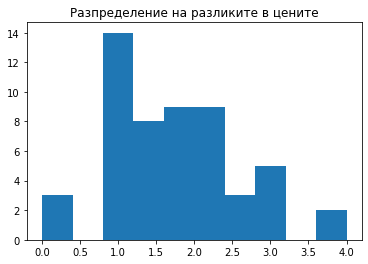

In [37]:
plt.hist(menu["Разлика в цената"])
plt.title("Разпределение на разликите в цените")
plt.show()

От графиката се вижда, че "разликите в цените" са най-много до 2.5 лв, което може би не е особено голяма разлика, но като се има впредвид, че средната цена е около 10 лв, това прави е една четвърт от цената.

In [38]:
menu["Разлика в цената"].mean()

1.6981132075471699

In [39]:
menu["Разлика в цената"].mode()

0    1.0
dtype: float64

In [40]:
menu["Разлика в цената"].median()

1.6999999999999993

In [41]:
menu[menu["Разлика в цената"] == menu["Разлика в цената"].max()]

,Ястие,Грамаж в гр.,Цена извън София,Алергени,Съставки,Цена София Нова,Разлика в цената
48,ГЪШИ ДРОБ ГЛАЗИРАН С МЕДЕНО ЦАРСКО ГРОЗДЕ,250,19.9,/1/,NaN,23.9,4.0


In [42]:
menu[menu["Разлика в цената"] == menu["Разлика в цената"].min()]

,Ястие,Грамаж в гр.,Цена извън София,Алергени,Съставки,Цена София Нова,Разлика в цената
36,"ЗАПЕЧЕН ПРЕСЕН КАШКАВАЛ ГЮБЕК ОТ МАНДРА ""МОГИЛ...",150,1.0,/7/,NaN,1.0,0.0


In [43]:
small_margin=menu[menu["Разлика в цената"] < 2.5]
small_margin

,Ястие,Грамаж в гр.,Цена извън София,Алергени,Съставки,Цена София Нова,Разлика в цената
1,СЕЛСКА РАЗЯДКА,200,5.9,"/1,7,8,12/","/от пържени люти чушки с масло, сирене.и черве...",7.9,2.0
4,РАЗЯДКА ОТ МЕКО КРАВЕ СИРЕНЕ С ТРЮФЕЛИ,200,8.9,"/1,6,7,8/","/гарнирана със сотирани гъби в масло,Чесън и м...",10.9,2.0
6,"ЗАПЕЧЕНА БРУСКЕТА СЪС СИРЕНА, АВОКАДО, ЯДКИ,И ...",180,12.7,"/1, 4,6,7,8,11,12/",NaN,13.9,1.2
7,"ЗАПЕЧЕНА БРУСКЕТА С КОЗЕ СИРЕНЕ, БРИ И КРУШИ",160,7.6,"/1,7,8,12/","/гарнирана с мед, печени орехи и мащерка/",8.9,1.3
8,ШОПСКА САЛАТА,300,6.9,"/1,7/",NaN,8.8,1.9
10,ГРЪЦКА САЛАТА,380,7.9,"/6,7/.",NaN,9.8,1.9
11,ПЪРЖЕНИ ЧОРБАДЖИЙСКИ ЧУШКИ С МУС ОТ СИРЕНЕ ФЕТ...,300,7.8,"/6, 7, 10,12/","/подправени с дресинг, чесън, копър и риган/",8.9,1.1
12,САЛАТА ОТ БЕЛЕНИ ДОМАТИ СЪС СИРЕНЕ ПО ИЗБОР - ...,300,7.5,"/7,8/","/подправена с билков зехтин, риган, орехии мар...",8.9,1.4
13,САЛАТА ОТ БЕЛЕНИ ДОМАТИ СЪС СИРЕНЕ ПО ИЗБОР - ...,300,8.9,"/7,8/","/подправена с билков зехтин, риган, орехии мар...",9.9,1.0
14,САЛАТА ОТ БЕЛЕНИ ДОМАТИ СЪС СИРЕНЕ ПО ИЗБОР - ...,300,8.9,"/7,8/","/подправена с билков зехтин, риган, орехии мар...",9.9,1.0


In [44]:
len(small_margin)

43

In [45]:
big_margin=menu[menu["Разлика в цената"] >= 2.5]
big_margin

,Ястие,Грамаж в гр.,Цена извън София,Алергени,Съставки,Цена София Нова,Разлика в цената
0,ТАРАМА ХАЙВЕР,150,5.9,"/1, 4,6,7/","/домашна разбит с пушена сьомга , гарнирансъсз...",8.6,2.7
2,БЪЛГАРСКИ РАЗЯДКИ,200,5.9,"/1,67,8,12/","/разяйдка с пържен патладжан и чесън, разядка ...",8.7,2.8
3,МУС С АВОКАДО И КРЕМ СИРЕНЕ,120,5.9,"/1,7,8/","/подправен с чесън, копър и печени лешници/",8.6,2.7
5,ПЛАТО ОТ БЪЛГАРСКИ МЕЗЕТА И РАЗЯДКИ,450,25.9,"/1,6,7,8,9,12/",NaN,28.9,3.0
23,"ВЕГАН САЛАТА ОТ ДОМАТИ, ЛИМЕЦ, РУКОЛА, МАСЛИНИ...",300,7.9,"/1,8,12/ /подправена със зелен лук, чесън, пр...",NaN,10.8,2.9
44,МЛЕЧНО ТЕЛЕШКИ ЕЗИК В МАСЛО С ПЕЧУРКА И МАНАТА...,200,16.9,"/7,8,12/","/поднесен с чесън, мащерка и песто т сушени.до...",19.9,3.0
48,ГЪШИ ДРОБ ГЛАЗИРАН С МЕДЕНО ЦАРСКО ГРОЗДЕ,250,19.9,/1/,NaN,23.9,4.0
51,ЗАПЕЧЕНИ ПРЕСНИ БРОКОЛИ В ЦАРЕВИЧЕН СОС СЪС СИ...,250,9.9,"/1,6,7.8.11/",NaN,13.8,3.9
52,ЗАПЕЧЕН МИШ- МАШ В НАШ СТИЛ,300,8.9,"/3,7/",NaN,11.8,2.9
53,ПЪЛНЕН ПАТЛАДЖАН С МУС ОТ СИРЕНЕ ФЕТАКИ,300,12.9,"/1, 6, 7, 8,9, 11/","/в доматен сос с чорбадживеки чушки,чесън и ри...",15.9,3.0


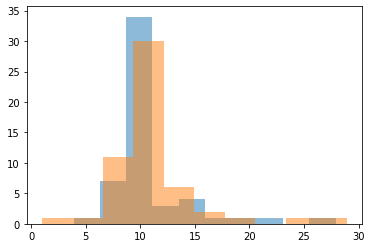

In [46]:
alpha = 0.5
plt.hist(menu_old["Цена"], alpha = alpha)
plt.hist(menu["Цена София Нова"], alpha = alpha)
plt.title = "Сравнение в цените"
plt.show()

### Изводи
От наблюдаваните данни по-горе мога да заключа, че в град София цените в ресторант "Щастливеца" са по-високи, отколкото в другите градове, където има ресторанти от тази верига и че цените в ресторанти "Щастливеца" се покачват с течение на времето.
Безспорно столицата София е най-скъпият град в България, където наемите на заведения и заплататите на персонала са по-високи, което на свой ред е силно вероятна предпоставка за тази ценова разлика, която забелязвам по отношение на различните градове.